<a href="https://colab.research.google.com/github/Eduard25/Redes/blob/master/Tarea6_3-c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Layer, Input, Flatten
from keras.optimizers import RMSprop, Adam

from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
loss_tracker = keras.metrics.Mean(name="loss")

In [21]:
class coeficientes(Layer):

    def __init__(self, units=32, activation=None):
        super(coeficientes,self).__init__()
        self.units=units
        self.activation=tf.keras.activations.get(activation)

    def build(self, input_shape):

        a_init = tf.random_normal_initializer()
        a_init_val = a_init(shape=(input_shape[-1],self.units),dtype= 'float32')
        self.a = tf.Variable(initial_value=a_init_val, trainable='true')

        b_init = tf.random_normal_initializer()
        b_init_val = b_init(shape=(input_shape[-1],self.units),dtype= 'float32')
        self.b = tf.Variable(initial_value=b_init_val, trainable='true')

        c_init= tf.zeros_initializer()
        c_init_val = c_init(shape=(input_shape[-1],self.units,),dtype='float32')
        self.c = tf.Variable(initial_value=c_init_val,trainable='true')

        d_init= tf.zeros_initializer()
        d_init_val = d_init(shape=(self.units,),dtype='float32')
        self.d = tf.Variable(initial_value=c_init_val,trainable='true')


    def call(self, inputs):
        x_triple= tf.math.pow(inputs, 3)
        x_triple_times_a= tf.matmul(x_triple,self.a)
        x_squared= tf.math.square(inputs)
        x_squared_times_b = tf.matmul(x_squared,self.b)
        x_times_c= tf.matmul(inputs,self.c)
        x3a_plus_x2b_plus_xc_plus_d = x_triple_times_a+x_squared_times_b+x_times_c+self.d

        return self.activation(x3a_plus_x2b_plus_xc_plus_d)

In [4]:
class Funsol(Sequential):
    @property
    def metrics(self):
        return [loss_tracker]

    def train_step(self, data):
        batch_size =100
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = tf.math.cos(2*x)


        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [22]:
model = Funsol()

model.add(Flatten(input_shape=(28,28)))
model.add(coeficientes(128,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()

Model: "funsol_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 coeficientes_7 (coeficient  (784, 128)                401408    
 es)                                                             
                                                                 
 dropout (Dropout)           (784, 128)                0         
                                                                 
 dense_4 (Dense)             (784, 1)                  129       
                                                                 
Total params: 401537 (1.53 MB)
Trainable params: 401537 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer=Adam(), metrics=['loss'])

x=tf.linspace(-1,1,100)

history = model.fit(x,epochs=600,verbose=1)
plt.plot(history.history["loss"])
plt.show()

Epoch 1/600


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "<ipython-input-4-523fafab3bfe>", line 13, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_file864vwb0w.py", line 11, in tf__call
        x_triple_times_a = ag__.converted_call(ag__.ld(tf).matmul, (ag__.ld(x_triple), ag__.ld(self).a), None, fscope)

    ValueError: Exception encountered when calling layer 'coeficientes_7' (type coeficientes).
    
    in user code:
    
        File "<ipython-input-8-1f55e977af75>", line 29, in call  *
            x_triple_times_a= tf.matmul(x_triple,self.a)
    
        ValueError: Dimensions must be equal, but are 1 and 784 for '{{node funsol_12/coeficientes_7/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](funsol_12/coeficientes_7/Pow, funsol_12/coeficientes_7/MatMul/ReadVariableOp)' with input shapes: [100,1], [784,128].
    
    
    Call arguments received by layer 'coeficientes_7' (type coeficientes):
      • inputs=tf.Tensor(shape=(100, 1), dtype=float32)


4/4 [==============================] - 0s 8ms/step


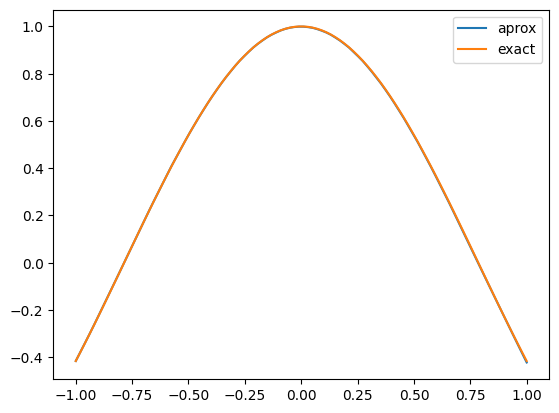

In [7]:
x_testv = tf.linspace(-1,1,100)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,tf.math.cos(2*x),label="exact")
plt.legend()
plt.show()